In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from CSIKit.util import csitools
from CSIKit.reader import get_reader

<h3>Convert pcap to csv</h3>

In [3]:
path = os.getcwd() + "\samsung_csi_data_pcap"   # "\team1_csi_data_pcap"
filenames = os.listdir(path)

for filename in filenames:
    fpath = os.path.join(path, filename)
    my_reader = get_reader(fpath)
    csi_data = my_reader.read_file(fpath)
    csi_matrix, no_frames, no_subcarriers = csitools.get_CSI(csi_data, metric="amplitude")

    csi_matrix_first = csi_matrix[:, :, 0, 0]
    csi_matrix_squeezed = np.squeeze(csi_matrix_first)

    df = pd.DataFrame(csi_matrix_squeezed)
    df.to_csv(f'samsung_csi_data_csv/{filename[:-5]}.csv', index=False)   # "\team1_csi_data_csv"

<h3>Validation</h3>

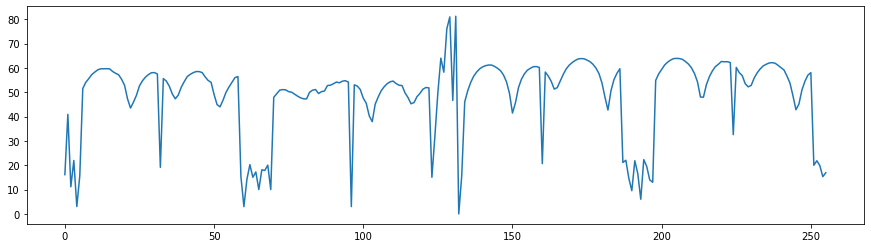

In [4]:
path = os.getcwd() + "\samsung_csi_data_csv"   # "\team1_csi_data_csv"
filename = os.listdir(path)[0]
fpath = os.path.join(path, filename)
data = pd.read_csv(fpath)

pd.DataFrame(data.iloc[0]).plot.line(figsize=[15, 4], legend=False)
plt.show()